In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from astropy import constants as const
from astropy import units as u
from astropy.time import Time
from astropy.table import Table
from matplotlib.colors import LogNorm

import sys
sys.path.append('/Users/james/Dropbox/python/cubehelix/')
import cubehelix

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
CMAP1 = cubehelix.cmap(start=0.5, rot=-0.6, sat=1.8, reverse=True)
CMAP2 = cubehelix.cmap(start=1.5, rot=-0.6, sat=1.8, reverse=True)

In [4]:
# SN 2023ixf Properties: https://www.wis-tns.org/object/2023ixf/discovery-cert
# distance from Cepheids: https://ned.ipac.caltech.edu/reflookup?refcode=2013ApJ...777...79M
d0 = 6.19 * u.Mpc

t0 = Time(2460084.2272569, format='jd')
c0 = SkyCoord(ra=210.91075*u.deg, dec=54.311694*u.deg, frame='icrs', distance=d0)

In [5]:
# https://arxiv.org/abs/2012.02061
GCNS_file = '/Users/james/Dropbox/research_projects/lonely_stars/GCNS_cat.fits'
GCNS = Table.read(GCNS_file, format='fits')

# past me already did this, yay! 
# https://github.com/jradavenport/lonely_stars/blob/main/GCNS_KDTree.ipynb
c1 = SkyCoord(ra = GCNS['RA'] * u.degree,
              dec = GCNS['DEC'] * u.degree,
              distance= GCNS['DIST_50'] * u.kpc,
              frame='icrs')

len(GCNS)
# xyz = c1.transform_to(coord.Galactocentric)

331312

In [6]:
t1 = Time.now()# - (1 * u.day)
t1 = Time({'year': 2023, 'month': 5, 'day': 30, 'hour':12}, format='ymdhms')
# t1 = Time({'year': 2088, 'month': 2, 'day': 23}, format='ymdhms')
dt = t1-t0

# dt.sec
# dt.jd
dt.to('year')

<Quantity 0.02949416 yr>

In [7]:
int(t1.mjd)

60094

In [8]:
c = d0.to('lyr') / 2 # dist to foci from ellipse center
a = (((dt.to('s') * const.c) / 2) + c).to('lyr') # the semi-major axis of ellipse
print(a-c)

d1 = (GCNS['DIST_50'] * u.kpc) # dist to GCNS stars

d2 = c1.separation_3d(c0)

0.014747081324458122 lyr


In [9]:
# A few things to compute for each GCNS object:

# 1. has it seen SN  yet?
SNYES = d2.to('lyr').value <= (d0.to('lyr') + (dt.to('s') * const.c)).to('lyr').value
SNNO = ~SNYES

# 2. is it within the "SETI ellipse"?
EYES = (d1.to('lyr').value + d2.to('lyr').value) <= (2 * a.to('lyr').value)
ENO = ~EYES

# 3. is it within some tolerance of being ON the ellipse?
#    this could be within some range in distance or in time, thanks to speed of light...
tol = 0.1 # in lyr
OYES = np.abs((d1.to('lyr').value + d2.to('lyr').value) - (2 * a.to('lyr').value)) <= tol

In [10]:
print(len(d1))
print(sum(SNYES), sum(SNNO))
print('inside ellipsoid:', sum(EYES))
print('within tol of surface:', sum(OYES))
# print(sum(SNYES) / (sum(SNYES) + sum(SNNO)))
# print(sum(SNNO) / (sum(SNYES) + sum(SNNO)))
# print(sum(EYES) / (sum(SNYES) + sum(SNNO)))

331312
164627 166685
inside ellipsoid: 23
within tol of surface: 108


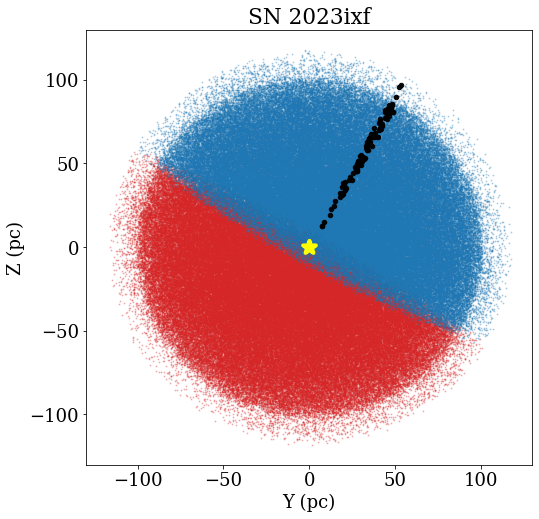

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(GCNS['YCOORD_50'][SNNO], GCNS['ZCOORD_50'][SNNO], c='C3', s=1, alpha=0.25, rasterized=True)
plt.scatter(GCNS['YCOORD_50'][SNYES],GCNS['ZCOORD_50'][SNYES], c='C0', s=1, alpha=0.25, rasterized=True)
plt.scatter(GCNS['YCOORD_50'][EYES], GCNS['ZCOORD_50'][EYES], c='C6', s=4, alpha=0.5, rasterized=True)
plt.scatter(GCNS['YCOORD_50'][OYES], GCNS['ZCOORD_50'][OYES], c='k', s=20, alpha=0.95, rasterized=True)

plt.scatter([0],[0], c='yellow', marker='*', s=180, lw=4)
plt.title('SN 2023ixf')
plt.xlabel('Y (pc)')
plt.ylabel('Z (pc)')
# plt.grid(True)
plt.xlim(-130,130)
plt.ylim(-130,130)
plt.savefig('SN2023ixf.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

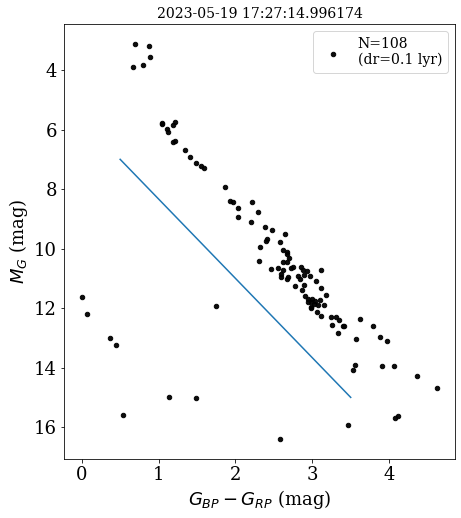

In [12]:
plt.figure(figsize=(7,8))

# plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][SNNO] - GCNS['PHOT_RP_MEAN_MAG'][SNNO],
#             GCNS['PHOT_G_MEAN_MAG'][SNNO] - 5.*np.log10(GCNS['DIST_50'][SNNO]*1000)+5, 
#             c='C3', s=1, alpha=0.25, rasterized=True)
# plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][SNYES] - GCNS['PHOT_RP_MEAN_MAG'][SNYES],
#             GCNS['PHOT_G_MEAN_MAG'][SNYES] - 5.*np.log10(GCNS['DIST_50'][SNYES]*1000)+5, 
#             c='C0', s=1, alpha=0.25, rasterized=True)

# plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][EYES] - GCNS['PHOT_RP_MEAN_MAG'][EYES],
#             GCNS['PHOT_G_MEAN_MAG'][EYES] - 5.*np.log10(GCNS['DIST_50'][EYES]*1000)+5, 
#             c='C6', s=4, alpha=0.5, rasterized=True)

plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][OYES] - GCNS['PHOT_RP_MEAN_MAG'][OYES],
            GCNS['PHOT_G_MEAN_MAG'][OYES] - 5.*np.log10(GCNS['DIST_50'][OYES]*1000)+5, 
            c='k', s=20, alpha=0.95, rasterized=True, label='N='+str(sum(OYES))+'\n(dr=0.1 lyr)')

# yerr = 
# xerr = GCNS['']

# plt.scatter(GCNS['YCOORD_50'][SNYES],GCNS['ZCOORD_50'][SNYES], c='C0', s=1, alpha=0.25, rasterized=True)
# plt.scatter(GCNS['YCOORD_50'][EYES], GCNS['ZCOORD_50'][EYES], c='C6', s=4, alpha=0.5, rasterized=True)
# plt.scatter(GCNS['YCOORD_50'][OYES], GCNS['ZCOORD_50'][OYES], c='k', s=20, alpha=0.95, rasterized=True)

plt.gca().invert_yaxis()
plt.title(str(t0.datetime), fontsize=14)
plt.plot([0.5, 3.5], [7, 15])
plt.legend(fontsize=14)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
# plt.xlim(-130,130)
# plt.ylim(-130,130)
plt.savefig('SN2023ixf_CMD_on.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

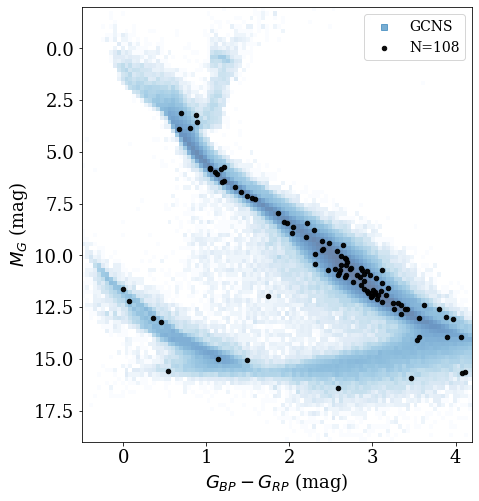

In [13]:
plt.figure(figsize=(7,8))

_ = plt.hist2d(GCNS['PHOT_BP_MEAN_MAG'] - GCNS['PHOT_RP_MEAN_MAG'],
            GCNS['PHOT_G_MEAN_MAG'] - 5.*np.log10(GCNS['DIST_50']*1000)+5, 
               bins=100, range=[[-0.5,4.2],[-2,19]], cmap=plt.cm.Blues, norm=LogNorm(), alpha=0.6)

plt.scatter([],[], c='C0', marker='s', label='GCNS', alpha=0.6)


plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][OYES] - GCNS['PHOT_RP_MEAN_MAG'][OYES],
            GCNS['PHOT_G_MEAN_MAG'][OYES] - 5.*np.log10(GCNS['DIST_50'][OYES]*1000)+5, 
            c='k', s=20, alpha=0.95, rasterized=True, label='N='+str(sum(OYES)))


plt.gca().invert_yaxis()
# plt.title(str(t0.datetime), fontsize=14)

plt.legend(fontsize=14)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
# plt.xlim(-130,130)
# plt.ylim(-130,130)
plt.savefig('SN2023ixf_CMD.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

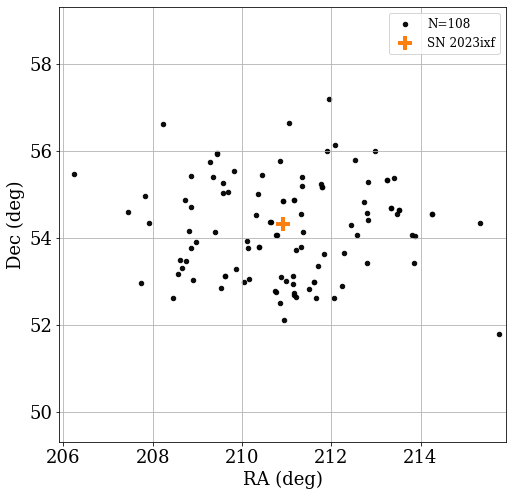

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(GCNS['RA'][OYES], GCNS['DEC'][OYES],c='k', s=20, alpha=0.95, 
            label='N='+str(sum(OYES)))#+'\n(dr=0.1 lyr)' )
plt.scatter(c0.ra, c0.dec, c='C1', marker='+', s=180,  lw=4, label='SN 2023ixf')
plt.legend(fontsize=12)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
da = 5
plt.xlim(c0.ra.value-da,c0.ra.value+da)
plt.ylim(c0.dec.value-da, c0.dec.value+da)
# plt.title(str(t0.datetime), fontsize=14)
plt.savefig('SN2023ixf_radec.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

array([  0,   1,   2,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  52,  53,  54,
        55,  56,  59,  60,  61,  62,  63,  64,  65,  66,  68,  69,  70,
        71,  72,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  91,  92,  93,  94,  95,  98,  99, 100,
       101, 103, 104, 105, 106, 107])

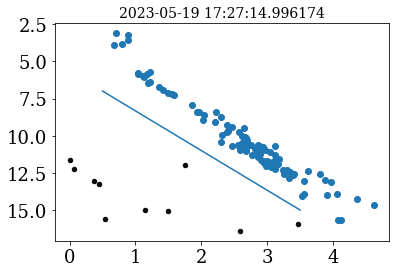

In [15]:
mm = (15-7)/(3.5-.5)
bb = 15 - (mm *3.5)

star = np.where((GCNS['PHOT_G_MEAN_MAG'][OYES] - 5.*np.log10(GCNS['DIST_50'][OYES]*1000)+5) < ( bb + (GCNS['PHOT_BP_MEAN_MAG'][OYES] - GCNS['PHOT_RP_MEAN_MAG'][OYES])*mm ))[0]

plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][OYES] - GCNS['PHOT_RP_MEAN_MAG'][OYES],
            GCNS['PHOT_G_MEAN_MAG'][OYES] - 5.*np.log10(GCNS['DIST_50'][OYES]*1000)+5, 
            c='k', s=20, alpha=0.95, rasterized=True)
plt.scatter(GCNS['PHOT_BP_MEAN_MAG'][OYES][star] - GCNS['PHOT_RP_MEAN_MAG'][OYES][star],
            GCNS['PHOT_G_MEAN_MAG'][OYES][star] - 5.*np.log10(GCNS['DIST_50'][OYES][star]*1000)+5)

# yerr = 
# xerr = GCNS['']

# plt.scatter(GCNS['YCOORD_50'][SNYES],GCNS['ZCOORD_50'][SNYES], c='C0', s=1, alpha=0.25, rasterized=True)
# plt.scatter(GCNS['YCOORD_50'][EYES], GCNS['ZCOORD_50'][EYES], c='C6', s=4, alpha=0.5, rasterized=True)
# plt.scatter(GCNS['YCOORD_50'][OYES], GCNS['ZCOORD_50'][OYES], c='k', s=20, alpha=0.95, rasterized=True)

plt.gca().invert_yaxis()
plt.title(str(t0.datetime), fontsize=14)
plt.plot([0.5, 3.5], [7, 15])

star

In [16]:
# etime = d2.to('lyr') + d1.to('lyr') - (2*c)
etime = (d2.to('lyr') + d1.to('lyr') - (2*c)).value + t0.decimalyear
etime

array([2424.80391402, 2235.92414713, 2149.14293198, ..., 2374.71864929,
       2216.45163749, 2553.60099884])

In [17]:
stars = np.zeros(sum(OYES),dtype=int)
stars[star] = 1
df_out = pd.DataFrame(data={'ra':GCNS['RA'][OYES], 'dec':GCNS['DEC'][OYES], 
                            'd(pc)':GCNS['DIST_50'][OYES]*1000, 
                            'bp_rp': GCNS['PHOT_BP_MEAN_MAG'][OYES] - GCNS['PHOT_RP_MEAN_MAG'][OYES],
                            'M_G':GCNS['PHOT_G_MEAN_MAG'][OYES] - 5.*np.log10(GCNS['DIST_50'][OYES]*1000)+5,
                            'crossMJD':Time(etime[OYES], format='decimalyear').mjd, 
                            'pmra':GCNS['PMRA'][OYES],
                            'pmdec':GCNS['PMDEC'][OYES],
                            'parallax':GCNS['PARALLAX'][OYES],
                            'rv':GCNS['ADOPTEDRV'][OYES],
                            'star':stars,
                            'source_id':GCNS['SOURCE_ID'][OYES]})
df_out
df_out.to_csv('SN2023ixf_'+str(int(t1.mjd))+'.csv')

In [18]:
# # a different output file for Sofia
# df_out2 = pd.DataFrame(data={'ra':GCNS['RA'][OYES],
# 'dec':GCNS['DEC'][OYES],
# 'pmra':GCNS['PMRA'][OYES],
# 'pmdec':GCNS['PMDEC'][OYES],
# 'parallax':GCNS['PARALLAX'][OYES],
# 'rv':GCNS['ADOPTEDRV'][OYES],'source_id':GCNS['SOURCE_ID'][OYES]})
# df_out2.to_csv('SN2023ixf_'+str(int(t1.mjd))+'_v2.csv')

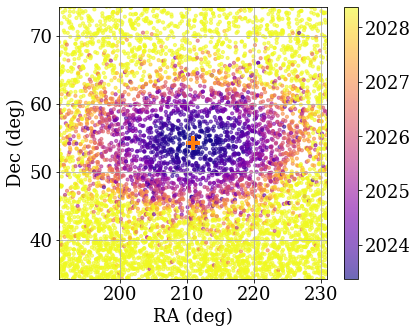

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(GCNS['RA'], GCNS['DEC'], c=etime, s=10, alpha=0.6, cmap=plt.cm.plasma )
plt.clim(t0.decimalyear, t0.decimalyear + 5)
cb = plt.colorbar()

plt.scatter(c0.ra, c0.dec, c='C1', marker='+', s=180,  lw=4)
plt.grid(True)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
da = 20
plt.xlim(c0.ra.value-da,c0.ra.value+da)
plt.ylim(c0.dec.value-da, c0.dec.value+da)
plt.savefig('SN2023ixf_radec_time.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [20]:

for k in range(10):
    tok = np.where((etime > (2023+k)) & (etime <= (2023+(k+1))))[0]
    msep = np.nanmedian(c1[tok].separation(c0).value)
    print(2023+k, msep)


2023 3.0512908890656942
2024 5.7138880141037784
2025 7.6181284507837495
2026 9.40172637986154
2027 10.6473278546593
2028 12.032432924114433
2029 13.12725680730248
2030 14.185884539166615
2031 15.426500918383164
2032 16.276671928321335


In [21]:
dda = np.where((np.sqrt((GCNS['RA'].value - c0.ra.value)**2 + (GCNS['DEC'].value - c0.dec.value)**2) < da))[0]


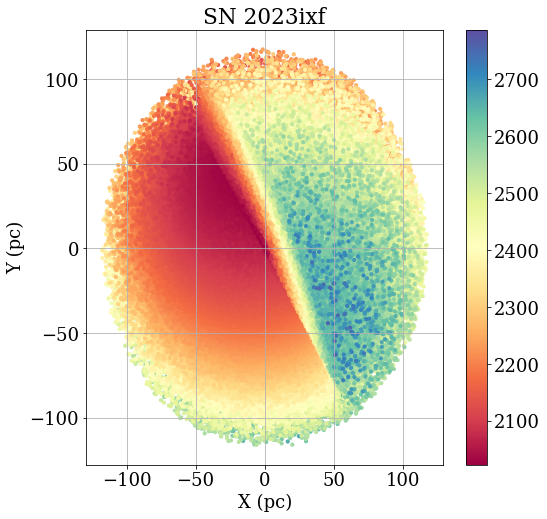

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(GCNS['XCOORD_50'], GCNS['YCOORD_50'], c=etime, s=10, cmap=plt.cm.Spectral)
# plt.xlim(-10,10)
# plt.ylim(-10,10)
# plt.clim(2023,2080)
cb = plt.colorbar()

plt.title('SN 2023ixf')
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
plt.grid(True)

(2021.0, 2222.0)

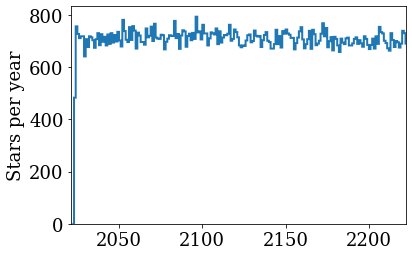

In [23]:
_ = plt.hist(etime, bins=np.arange(2022,2600), histtype='step', lw=2)
plt.ylabel('Stars per year')
plt.xlim(2021,2222)

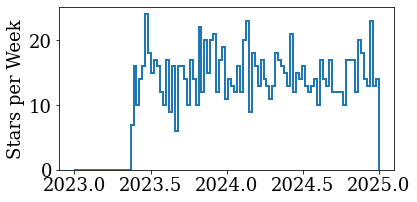

In [24]:
plt.figure(figsize=(6,3))
_ = plt.hist(etime,bins=np.linspace(2023,2025,104), histtype='step', lw=2)
plt.ylabel('Stars per Week')
plt.savefig('SN2023ixf_time2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)